# Imports


In [418]:
import pandas as pd

In [419]:
%config INlineBackend.figure_formats = ['svg']

In [420]:
from matplotlib import pyplot as plt

In [421]:
import numpy as np

In [767]:
from sklearn.cluster import KMeans

# Datasets

## Data_case creation

In [759]:
data_case = pd.read_csv('case.csv').rename(columns ={"pesquisa_de_satisfa_o__c": "satisfaction", "assunto": "request"}).dropna()

In [761]:
data_case["id_verification"] = np.where(data_case["accountid"] == data_case["Id"], "True", "False")

In [762]:
grouped_data_id = data_case.groupby("id_verification").size()

In [763]:
grouped_data_id

id_verification
True    11585
dtype: int64

In [764]:
data_case.drop(columns = ["Unnamed: 0", "Id", "id_verification"], inplace = True)

##### Run data_case

In [739]:
data_case

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request
64,0013j00002u3av5AAA,2020-06-03,2.0,4.0,False,Enviado,Pedido:Confirmação do pedido:
65,0013j00002u3av5AAA,2020-06-15,2.0,9.0,False,Incrivel,Logística:OS:Tracking de OS
75,0013j00002ykiCOAAY,2020-06-24,2.0,11.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas
76,0013j00002ykiCOAAY,2020-06-25,2.0,7.0,False,Enviado,Produto:Pinpad:Falha no pareamento
78,0013j00002mYasGAAS,2020-04-09,2.0,10.0,False,Enviado,Logística:OS:Tracking de OS
...,...,...,...,...,...,...,...
126949,0013j00002twvTwAAI,2020-05-26,2.0,11.0,False,Enviado,Aplicativo:Dúvidas funcionalidades App:Saldo
126954,0013j00002twvTwAAI,2020-06-01,2.0,13.0,False,Enviado,Produto:D195:Dúvida D195
126957,0013j00002teCDNAA2,2020-06-30,2.0,8.0,False,Enviado,Produto:S920:Dúvida S920
126971,0013j00002ye8jtAAA,2020-06-23,2.0,5.0,False,Enviado,Logística:OS:Tracking de OS


# verificação outliers waitingtime


In [740]:
data_case.channelid.value_counts()

2.0    11585
Name: channelid, dtype: int64

In [741]:
data_case.waitingtime.value_counts()

10.0      907
9.0       905
8.0       863
11.0      782
12.0      733
         ... 
276.0       1
697.0       1
624.0       1
1140.0      1
259.0       1
Name: waitingtime, Length: 343, dtype: int64

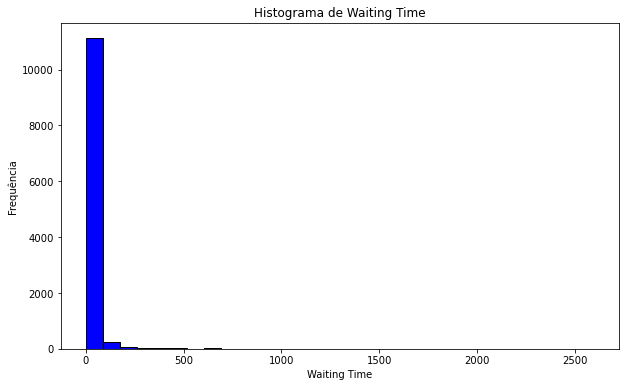

In [742]:
plt.figure(figsize=(10, 6))
plt.hist(data_case['waitingtime'], bins=30, color='blue', edgecolor='black')

plt.xlabel('Waiting Time')
plt.ylabel('Frequência')
plt.title('Histograma de Waiting Time')

# Mostrar o gráfico
plt.show()

In [747]:
from scipy.stats import zscore

z_scores_waitingtime = zscore(data_case['waitingtime'])

outliers_waitingtime = (z_scores_waitingtime > 3) | (z_scores_waitingtime < -3)

data_case['outliers_waitingtime'] = outliers_waitingtime


In [748]:
#conferência 
grouped_data_id = data_case.groupby("outliers_waitingtime").size()
grouped_data_id

outliers_waitingtime
False    11178
True       271
dtype: int64

In [749]:
# Dropar as linhas onde outliers_waitingtime é True
data_case_cleaned = data_case.drop(data_case[data_case['outliers_waitingtime']].index)

# Dropar a coluna outliers_waitingtime do DataFrame
data_case = data_case_cleaned.drop(columns=['outliers_waitingtime'])


In [750]:
data_case

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request
64,0013j00002u3av5AAA,2020-06-03,2.0,4.0,False,Enviado,Pedido:Confirmação do pedido:
65,0013j00002u3av5AAA,2020-06-15,2.0,9.0,False,Incrivel,Logística:OS:Tracking de OS
75,0013j00002ykiCOAAY,2020-06-24,2.0,11.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas
76,0013j00002ykiCOAAY,2020-06-25,2.0,7.0,False,Enviado,Produto:Pinpad:Falha no pareamento
78,0013j00002mYasGAAS,2020-04-09,2.0,10.0,False,Enviado,Logística:OS:Tracking de OS
...,...,...,...,...,...,...,...
126949,0013j00002twvTwAAI,2020-05-26,2.0,11.0,False,Enviado,Aplicativo:Dúvidas funcionalidades App:Saldo
126954,0013j00002twvTwAAI,2020-06-01,2.0,13.0,False,Enviado,Produto:D195:Dúvida D195
126957,0013j00002teCDNAA2,2020-06-30,2.0,8.0,False,Enviado,Produto:S920:Dúvida S920
126971,0013j00002ye8jtAAA,2020-06-23,2.0,5.0,False,Enviado,Logística:OS:Tracking de OS


In [751]:
data_case.drop_duplicates(subset=['date_ref', 'accountid', 'channelid', 'waitingtime', 'missed', 'satisfaction', 'request'], inplace=True)

## Data_cred creation

In [621]:
data_cred = pd.read_csv('cred.csv').dropna().drop_duplicates()
data_cred.drop(columns = "Unnamed: 0", inplace = True)

In [622]:

data_cred.drop_duplicates(subset=['cred_date', 'shipping_address_city', 'shipping_address_state', 'max_machine', 'accountid'], inplace=True)


##### Data_cred creation

In [623]:
data_cred

,cred_date,shipping_address_city,shipping_address_state,max_machine,accountid
4,2020-07-28,São Gonçalo,RJ,T3,0013j00002z0CeEAAU
7,2020-08-28,Itaboraí,RJ,T1,0013j00002zQgldAAC
15,2020-10-02,Joinville,SC,T1,0013j0000304oN9AAI
23,2020-07-24,São João de Meriti,RJ,T2,0013j00002yzpxZAAQ
25,2020-07-29,Nortelândia,MT,T1,0013j00002z0RA5AAM
...,...,...,...,...,...
126968,2020-08-06,Fortaleza,CE,T3,0013j00002z1gZ4AAI
126971,2020-06-18,Aracaju,SE,T3,0013j00002ye8jtAAA
126974,2020-07-31,Niterói,RJ,T2,0013j00002z1AyaAAE
126975,2020-09-16,Itajaí,SC,T3,0013j00002zfshHAAQ


In [624]:
data_cred.accountid.value_counts()

0013j00002ylpL1AAI    1
0013j00002ypQCSAA2    1
0013j0000304YVhAAM    1
0013j00002zhbobAAA    1
0013j00002y67Y6AAI    1
                     ..
0013j00002zgRgDAAU    1
0013j00002zfspVAAQ    1
0013j00002yzgJWAAY    1
0013j00002ylkwwAAA    1
0013j00002zOk5kAAC    1
Name: accountid, Length: 31429, dtype: int64

# Questão 1 - Significância estatística

## verificação das datas

In [766]:
data_case['date_ref'] = pd.to_datetime(result['date_ref'])

linha_menor_data = result.loc[result['date_ref'].idxmax()]
print(linha_menor_data)

accountid              0013j00002ygVarAAE
date_ref              2020-06-30 00:00:00
channelid                             2.0
waitingtime                          12.0
missed                              False
satisfaction                      Enviado
request          Produto:D195:Dúvida D195
cluster                               0.0
macro_request                     Produto
Name: 95, dtype: object


In [588]:
data_case["request_cat"] = np.where(data_case["request"].str.contains("Produto"), "Produto", "others")
grouped_data = data_case.groupby("date_ref").size()

In [589]:
grouped_data

date_ref
2020-02-23      1
2020-02-25      1
2020-02-26     20
2020-02-27     25
2020-02-28     23
             ... 
2020-06-26    340
2020-06-27    156
2020-06-28    102
2020-06-29    405
2020-06-30    325
Length: 124, dtype: int64

## Análise das datas com filtro

In [590]:
data_case_per_product = data_case.loc[data_case["request_cat"].str.upper().str.contains("PRODUTO")]

In [591]:
data_case_per_product

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request,request_cat
75,0013j00002ykiCOAAY,2020-06-24,2.0,11.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,Produto
76,0013j00002ykiCOAAY,2020-06-25,2.0,7.0,False,Enviado,Produto:Pinpad:Falha no pareamento,Produto
99,0013j00002tgA6IAAU,2020-05-02,2.0,18.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,Produto
142,0013j00002tfIXQAA2,2020-05-07,2.0,13.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,Produto
283,0013j00002u3aFAAAY,2020-06-16,2.0,7.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,Produto
...,...,...,...,...,...,...,...,...
126753,0011L00002cptiXQAQ,2020-04-07,2.0,8.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,Produto
126754,0011L00002cptiXQAQ,2020-04-07,2.0,8.0,False,Enviado,Produto:mPOS:Falha na atualização,Produto
126843,0013j00002yTIwqAAG,2020-06-28,2.0,19.0,False,Enviado,Produto:D195:Ativação,Produto
126954,0013j00002twvTwAAI,2020-06-01,2.0,13.0,False,Enviado,Produto:D195:Dúvida D195,Produto


In [441]:
data_case_per_product_grouped = data_case_per_product.groupby(["date_ref"]).size()

In [442]:
data_case_per_product_grouped

date_ref
2020-02-23      1
2020-02-26      5
2020-02-27      6
2020-02-28      7
2020-02-29      3
             ... 
2020-06-26     81
2020-06-27     46
2020-06-28     38
2020-06-29    112
2020-06-30    104
Length: 119, dtype: int64

# Questão 2

### Join Data

In [652]:
cred_case_join = pd.merge(data_case, data_cred, on='accountid', suffixes=('_case', '_cred')).sort_values(by='cred_date', ascending=False)
cred_case_join['macro_request'] = cred_case_join['request'].str.split(':', expand=True)[0]
cred_case = cred_case_join[cred_case_join['date_ref'] >= cred_case_join['cred_date']]

In [653]:
cred_case

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request,cred_date,shipping_address_city,shipping_address_state,max_machine,macro_request
7710,0013j00002ymqdEAAQ,2020-06-30,2.0,8.0,False,Enviado,Pedido:Cancelamento:Taxas,2020-06-30,Blumenau,SC,T3,Pedido
8094,0013j00002ymqQjAAI,2020-06-30,2.0,44.0,False,Enviado,Produto:D195:Dúvida D195,2020-06-30,Santo André,SP,T2,Produto
4974,0013j00002ymnmjAAA,2020-06-30,2.0,8.0,False,Enviado,Logística:OS:Tracking de OS,2020-06-30,Maceió,AL,T2,Logística
3919,0013j00002yPYTPAA4,2020-06-30,2.0,27.0,False,Enviado,Pedido:Confirmação do pedido:,2020-06-30,Sorocaba,SP,T2,Pedido
9733,0013j00002ymJKoAAM,2020-06-30,2.0,13.0,False,Enviado,Cadastro:Consulta de Dados:,2020-06-30,Arujá,SP,T1,Cadastro
...,...,...,...,...,...,...,...,...,...,...,...,...
10376,0011L00002WdAxbQAF,2020-06-20,2.0,15.0,False,Enviado,Cadastro:Alteração de dados:Nome fantasia,2019-07-24,Anápolis,GO,NONE,Cadastro
7809,0011L00002WdB5PQAV,2020-06-23,2.0,29.0,False,Incrivel,Produto:mPOS:Falha de Conexão - revertido,2019-07-24,São Sebastião,SP,T1,Produto
10586,0011L00002WdB4gQAF,2020-06-07,2.0,14.0,False,Enviado,Transação:Erro de transação:,2019-07-24,Recife,PE,T1,Transação
10585,0011L00002WdB4gQAF,2020-05-13,2.0,9.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,2019-07-24,Recife,PE,T1,Produto


In [638]:
cred_case.accountid.value_counts()

0013j00002tVQuPAAW    12
0013j00002tv7RlAAI    11
0013j00002tM2mcAAC    10
0013j00002tvJ4EAAU    10
0013j00002sy8sEAAQ     9
                      ..
0013j00002tMWboAAG     1
0013j00002tMjqdAAC     1
0011L00002Wfr3nQAB     1
0013j00002yfHpUAAU     1
0013j00002mWljDAAS     1
Name: accountid, Length: 6789, dtype: int64

In [654]:
# transformar para data
cred_case['date_ref'] = pd.to_datetime(cred_case['date_ref'])
cred_case['cred_date'] = pd.to_datetime(cred_case['cred_date'])

#criar date_diff
cred_case['date_diff'] = (cred_case['date_ref'] - cred_case['cred_date']).dt.days

#filtrar date_diff
cred_case = cred_case[cred_case['date_diff'] < 30]

#Data select

df_select = cred_case[['accountid', 'macro_request', 'shipping_address_state', 'max_machine', 'date_diff']]


<ipython-input-654-23d49fe33b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cred_case['date_ref'] = pd.to_datetime(cred_case['date_ref'])
<ipython-input-654-23d49fe33b65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cred_case['cred_date'] = pd.to_datetime(cred_case['cred_date'])
<ipython-input-654-23d49fe33b65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [655]:
df_select.accountid.value_counts()

0013j00002tVQuPAAW    9
0013j00002t0kAQAAY    8
0013j00002tv7RlAAI    8
0013j00002u3CbVAAU    8
0013j00002tM2mcAAC    8
                     ..
0013j00002yll8iAAA    1
0013j00002tgjXqAAI    1
0013j00002syCmBAAU    1
0013j00002t0N9EAAU    1
0013j00002tvW2PAAU    1
Name: accountid, Length: 5336, dtype: int64

In [656]:
df_select

,accountid,macro_request,shipping_address_state,max_machine,date_diff
7710,0013j00002ymqdEAAQ,Pedido,SC,T3,0
8094,0013j00002ymqQjAAI,Produto,SP,T2,0
4974,0013j00002ymnmjAAA,Logística,AL,T2,0
3919,0013j00002yPYTPAA4,Pedido,SP,T2,0
9733,0013j00002ymJKoAAM,Cadastro,SP,T1,0
...,...,...,...,...,...
456,0011L00002cpzN1QAI,Aplicativo,RS,T1,28
1105,0011L00002cptjVQAQ,Logística,SP,T1,28
2345,0011L00002cpzLPQAY,Aplicativo,RJ,T1,28
1104,0011L00002cptjVQAQ,Produto,SP,T1,28


In [701]:
df_select.to_excel('date_diff.xlsm', engine='openpyxl', index=False)

# Questão 3

In [664]:
cred_case_join

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request,cred_date,shipping_address_city,shipping_address_state,max_machine,macro_request
2910,0011L00002Y3mjiQAB,2020-05-13,2.0,13.0,False,Bom,Logística:Troca:D195,2020-10-30,João Pessoa,PB,T3,Logística
6439,0013j00002sxrWfAAI,2020-04-24,2.0,6.0,False,Enviado,Logística:Envio de Cartão pré-pago:1 via Ton,2020-10-29,São Paulo,SP,T1,Logística
10765,0011L00002QXj47QAD,2020-04-24,2.0,5.0,False,Enviado,Bandeiras:Dúvidas Bandeiras:Pedido de novas ba...,2020-10-27,Aracaju,SE,T2,Bandeiras
10766,0011L00002QXj47QAD,2020-05-06,2.0,13.0,False,Incrivel,Aplicativo:Dúvidas funcionalidades App:Prazos ...,2020-10-27,Aracaju,SE,T2,Aplicativo
11062,0013j00002t0kBIAAY,2020-06-23,2.0,87.0,False,Enviado,Cadastro::,2020-10-27,Ibirité,MG,T1,Cadastro
...,...,...,...,...,...,...,...,...,...,...,...,...
10376,0011L00002WdAxbQAF,2020-06-20,2.0,15.0,False,Enviado,Cadastro:Alteração de dados:Nome fantasia,2019-07-24,Anápolis,GO,NONE,Cadastro
7809,0011L00002WdB5PQAV,2020-06-23,2.0,29.0,False,Incrivel,Produto:mPOS:Falha de Conexão - revertido,2019-07-24,São Sebastião,SP,T1,Produto
10586,0011L00002WdB4gQAF,2020-06-07,2.0,14.0,False,Enviado,Transação:Erro de transação:,2019-07-24,Recife,PE,T1,Transação
10585,0011L00002WdB4gQAF,2020-05-13,2.0,9.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,2019-07-24,Recife,PE,T1,Produto


In [665]:
select_cluster_select = cred_case_join[['accountid','macro_request', 'max_machine']]
select_cluster = select_cluster_select[select_cluster_select['max_machine'] != 'NONE']

In [666]:
avg_atendimento = cred_case.groupby('macro_request')['waitingtime'].mean().reset_index()
avg_atendimento

,macro_request,waitingtime
0,Aplicativo,17.019630
1,Bandeira,17.757576
2,Bandeiras,19.281818
3,Cadastro,17.172727
4,Comunicados,5.000000
5,Feedback do cliente,16.779817
6,Incidente,21.333333
7,Logística,17.715947
8,Outros,20.500000
9,Pedido,15.945355


In [667]:
select_cluster

,accountid,macro_request,max_machine
2910,0011L00002Y3mjiQAB,Logística,T3
6439,0013j00002sxrWfAAI,Logística,T1
10765,0011L00002QXj47QAD,Bandeiras,T2
10766,0011L00002QXj47QAD,Aplicativo,T2
11062,0013j00002t0kBIAAY,Cadastro,T1
...,...,...,...
2001,0011L00002WdC77QAF,Logística,T1
7809,0011L00002WdB5PQAV,Produto,T1
10586,0011L00002WdB4gQAF,Transação,T1
10585,0011L00002WdB4gQAF,Produto,T1


In [668]:
select_cluster.macro_request.value_counts() / select_cluster.shape [0]

Produto                   0.275666
Logística                 0.255773
Aplicativo                0.241829
Cadastro                  0.065275
Pedido                    0.053108
Transferência de saldo    0.033659
Transação                 0.023091
Outros                    0.015275
Bandeiras                 0.014565
Feedback do cliente       0.014476
Bandeira                  0.004352
Risco                     0.001332
Incidente                 0.000710
Telecom                   0.000710
Comunicados               0.000178
Name: macro_request, dtype: float64

In [669]:
select_cluster.max_machine.value_counts() / select_cluster.shape [0]

T2    0.417496
T3    0.298934
T1    0.283570
Name: max_machine, dtype: float64

In [670]:
select_cluster.max_machine.value_counts()

T2    4701
T3    3366
T1    3193
Name: max_machine, dtype: int64

In [671]:
values_to_dummie = ['macro_request', 'max_machine']

cluster_d = pd.get_dummies(select_cluster, columns=values_to_dummie)

In [672]:
cluster_d

,accountid,macro_request_Aplicativo,macro_request_Bandeira,macro_request_Bandeiras,macro_request_Cadastro,macro_request_Comunicados,macro_request_Feedback do cliente,macro_request_Incidente,macro_request_Logística,macro_request_Outros,macro_request_Pedido,macro_request_Produto,macro_request_Risco,macro_request_Telecom,macro_request_Transação,macro_request_Transferência de saldo,max_machine_T1,max_machine_T2,max_machine_T3
2910,0011L00002Y3mjiQAB,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6439,0013j00002sxrWfAAI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
10765,0011L00002QXj47QAD,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10766,0011L00002QXj47QAD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11062,0013j00002t0kBIAAY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0011L00002WdC77QAF,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7809,0011L00002WdB5PQAV,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
10586,0011L00002WdB4gQAF,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
10585,0011L00002WdB4gQAF,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [673]:
x = cluster_d.drop('accountid', axis=1).div(cluster_d.drop('accountid', axis=1).sum(axis=1), axis=0)

x

,macro_request_Aplicativo,macro_request_Bandeira,macro_request_Bandeiras,macro_request_Cadastro,macro_request_Comunicados,macro_request_Feedback do cliente,macro_request_Incidente,macro_request_Logística,macro_request_Outros,macro_request_Pedido,macro_request_Produto,macro_request_Risco,macro_request_Telecom,macro_request_Transação,macro_request_Transferência de saldo,max_machine_T1,max_machine_T2,max_machine_T3
2910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
6439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
10765,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
10766,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
11062,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
7809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0
10586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
10585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0


In [675]:
km = KMeans(n_clusters = 3)
km.fit_predict(x)

array([1, 2, 0, ..., 2, 2, 2])

In [676]:
distortions = []
n_clusters = range (2, 15)
for n_clus in n_clusters:
    print(n_clus)
    distortions.append( KMeans(n_clusters = n_clus, max_iter = 10_000, n_init = 100, random_state = 61658).fit(x).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


In [677]:
distortions

[3044.0327003343746,
 2222.8185542609767,
 1918.0289252836876,
 1662.641097634196,
 1457.405708032403,
 1257.5249939704174,
 1080.4075440312395,
 902.378198928365,
 747.2719743252748,
 647.9790383506711,
 584.8884369630985,
 507.01970457544513,
 470.952001908019]

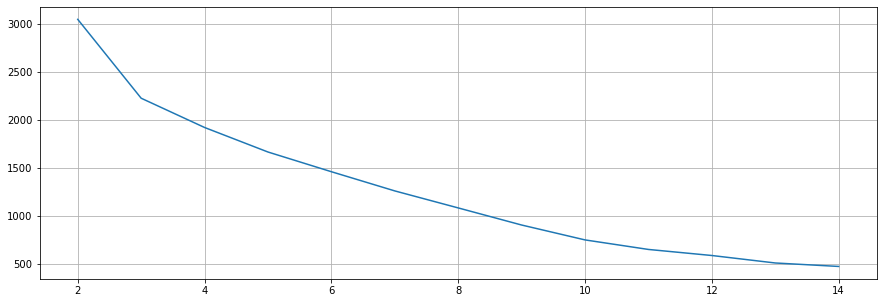

In [678]:
plt.figure(figsize = (15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [679]:
km = KMeans (n_clusters = 3, max_iter = 10_000, n_init = 100, random_state = 61658)
x_t = km.fit_predict(x)
x_t

array([1, 2, 0, ..., 2, 2, 2])

In [680]:
select_cluster.loc[:, 'cluster'] = x_t

C:\Users\danie\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\danie\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [681]:
select_cluster

,accountid,macro_request,max_machine,cluster
2910,0011L00002Y3mjiQAB,Logística,T3,1
6439,0013j00002sxrWfAAI,Logística,T1,2
10765,0011L00002QXj47QAD,Bandeiras,T2,0
10766,0011L00002QXj47QAD,Aplicativo,T2,0
11062,0013j00002t0kBIAAY,Cadastro,T1,2
...,...,...,...,...
2001,0011L00002WdC77QAF,Logística,T1,2
7809,0011L00002WdB5PQAV,Produto,T1,2
10586,0011L00002WdB4gQAF,Transação,T1,2
10585,0011L00002WdB4gQAF,Produto,T1,2


In [682]:
for col in select_cluster.drop(['cluster', 'accountid'], axis = 1).columns:
    for cl in np.sort(select_cluster.cluster.unique()):
        if select_cluster.dtypes[col] == object:
            vc = 100*select_cluster.loc[select_cluster.cluster == cl, col].value_counts() / (select_cluster.cluster == cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
            
        else: 
            print(f'{cl:d}; {col}_{select_cluster.loc[select_cluster.cluster == cl, col].mean():.2f}'.replace('.', ','))
        
    
for col in select_cluster.drop(['cluster', 'accountid'], axis = 1).columns:
    if select_cluster.dtypes[col] == object:
        vc = 100*select_cluster.loc[:, col].value_counts() / (select_cluster.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s};{cnt:5.2f}%'.replace('.', ','))
    else: 
        print(f'All;{col};{select_cluster.loc[:,col].mean():.2f}'.replace('.', ','))

0; macro_request_Produto; 28,97%
0; macro_request_Logística; 26,50%
0; macro_request_Aplicativo; 22,87%
0; macro_request_Cadastro;  6,19%
0; macro_request_Pedido;  5,42%
0; macro_request_Transferência de saldo;  3,15%
0; macro_request_Transação;  1,66%
0; macro_request_Outros;  1,60%
0; macro_request_Bandeiras;  1,49%
0; macro_request_Feedback do cliente;  1,45%
0; macro_request_Bandeira;  0,47%
0; macro_request_Risco;  0,13%
0; macro_request_Incidente;  0,04%
0; macro_request_Comunicados;  0,04%
0; macro_request_Telecom;  0,02%
1; macro_request_Produto; 26,98%
1; macro_request_Aplicativo; 25,04%
1; macro_request_Logística; 22,76%
1; macro_request_Cadastro;  8,73%
1; macro_request_Pedido;  4,19%
1; macro_request_Transferência de saldo;  4,16%
1; macro_request_Transação;  2,11%
1; macro_request_Bandeiras;  1,99%
1; macro_request_Feedback do cliente;  1,54%
1; macro_request_Outros;  1,46%
1; macro_request_Bandeira;  0,71%
1; macro_request_Risco;  0,18%
1; macro_request_Incidente;  0,15%


# Questão 4


In [ ]:
df['semana'] = df['data_col'].dt.isocalendar().week

In [683]:
data_case.accountid.value_counts()

0013j00002tVQuPAAW    14
0013j00002sxHktAAE    13
0013j00002tv7RlAAI    11
0013j00002tvJ4EAAU    10
0013j00002tM2mcAAC    10
                      ..
0013j00002sfwHIAAY     1
0011L00002NPShCQAX     1
0013j00002swwx5AAA     1
0013j00002ylrmTAAQ     1
0013j00002mWljDAAS     1
Name: accountid, Length: 7193, dtype: int64

In [755]:

result = pd.merge(data_case, select_cluster[['accountid', 'cluster', 'macro_request']], on='accountid', how='left')

result.drop_duplicates(subset=['accountid', 'date_ref', 'channelid', 'waitingtime', 'missed', 'satisfaction', 'request', 'cluster'], inplace=True)
result

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request,cluster,macro_request
0,0013j00002u3av5AAA,2020-06-03,2.0,4.0,False,Enviado,Pedido:Confirmação do pedido:,2.0,Logística
2,0013j00002u3av5AAA,2020-06-15,2.0,9.0,False,Incrivel,Logística:OS:Tracking de OS,2.0,Logística
4,0013j00002ykiCOAAY,2020-06-24,2.0,11.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,2.0,Produto
6,0013j00002ykiCOAAY,2020-06-25,2.0,7.0,False,Enviado,Produto:Pinpad:Falha no pareamento,2.0,Produto
8,0013j00002mYasGAAS,2020-04-09,2.0,10.0,False,Enviado,Logística:OS:Tracking de OS,0.0,Logística
...,...,...,...,...,...,...,...,...,...
24841,0013j00002twvTwAAI,2020-05-26,2.0,11.0,False,Enviado,Aplicativo:Dúvidas funcionalidades App:Saldo,1.0,Aplicativo
24844,0013j00002twvTwAAI,2020-06-01,2.0,13.0,False,Enviado,Produto:D195:Dúvida D195,1.0,Aplicativo
24847,0013j00002teCDNAA2,2020-06-30,2.0,8.0,False,Enviado,Produto:S920:Dúvida S920,1.0,Produto
24848,0013j00002ye8jtAAA,2020-06-23,2.0,5.0,False,Enviado,Logística:OS:Tracking de OS,1.0,Logística


In [756]:
result['date_ref'] = pd.to_datetime(result['date_ref'])
linha_maior_data = result.loc[result['date_ref'].idxmax()]
print(linha_maior_data)

accountid              0013j00002ygVarAAE
date_ref              2020-06-30 00:00:00
channelid                             2.0
waitingtime                          12.0
missed                              False
satisfaction                      Enviado
request          Produto:D195:Dúvida D195
cluster                               0.0
macro_request                     Produto
Name: 95, dtype: object


In [706]:
result['semana'] = result['date_ref'].dt.isocalendar().week
result_filtered = result[result['date_ref'] >= '2020-03-30']
result_filtered

,accountid,date_ref,channelid,waitingtime,missed,satisfaction,request,cluster,macro_request,semana
0,0013j00002u3av5AAA,2020-06-03,2.0,4.0,False,Enviado,Pedido:Confirmação do pedido:,2.0,Logística,23
2,0013j00002u3av5AAA,2020-06-15,2.0,9.0,False,Incrivel,Logística:OS:Tracking de OS,2.0,Logística,25
4,0013j00002ykiCOAAY,2020-06-24,2.0,11.0,False,Enviado,Produto:Cartão pré-pago:Dúvidas,2.0,Produto,26
6,0013j00002ykiCOAAY,2020-06-25,2.0,7.0,False,Enviado,Produto:Pinpad:Falha no pareamento,2.0,Produto,26
8,0013j00002mYasGAAS,2020-04-09,2.0,10.0,False,Enviado,Logística:OS:Tracking de OS,0.0,Logística,15
...,...,...,...,...,...,...,...,...,...,...
25454,0013j00002twvTwAAI,2020-05-26,2.0,11.0,False,Enviado,Aplicativo:Dúvidas funcionalidades App:Saldo,1.0,Aplicativo,22
25457,0013j00002twvTwAAI,2020-06-01,2.0,13.0,False,Enviado,Produto:D195:Dúvida D195,1.0,Aplicativo,23
25460,0013j00002teCDNAA2,2020-06-30,2.0,8.0,False,Enviado,Produto:S920:Dúvida S920,1.0,Produto,27
25461,0013j00002ye8jtAAA,2020-06-23,2.0,5.0,False,Enviado,Logística:OS:Tracking de OS,1.0,Logística,26


In [699]:
volume_chamados = result_filtered.groupby(['semana', 'cluster']).size().reset_index(name='volume_chamados')
volume_chamados

,semana,cluster,volume_chamados
0,14,0.0,52
1,14,1.0,61
2,14,2.0,89
3,15,0.0,81
4,15,1.0,75
5,15,2.0,96
6,16,0.0,107
7,16,1.0,73
8,16,2.0,123
9,17,0.0,144


# Tabelas usadas no .doc

In [753]:
estatisticas_por_macro = result.groupby('macro_request')['waitingtime'].describe()
estatisticas_por_macro['desvio_padrao'] = result.groupby('macro_request')['waitingtime'].std()
estatisticas_por_macro = estatisticas_por_macro.sort_values(by='desvio_padrao', ascending=False)

estatisticas_por_macro

,count,mean,std,min,25%,50%,75%,max,desvio_padrao
macro_request,,,,,,,,,
Risco,13.0,37.923077,69.134484,10.0,12.00,14.0,17.00,258.0,69.134484
Feedback do cliente,183.0,18.508197,33.552791,1.0,7.00,10.0,15.00,285.0,33.552791
Outros,147.0,18.333333,30.742486,1.0,7.50,10.0,16.00,246.0,30.742486
Logística,2917.0,18.373672,28.835056,1.0,8.00,11.0,16.00,284.0,28.835056
Bandeiras,175.0,17.525714,27.978813,1.0,8.00,10.0,14.00,219.0,27.978813
Transação,288.0,17.836806,27.396389,1.0,8.00,11.0,16.00,245.0,27.396389
Aplicativo,2657.0,16.964998,26.520237,1.0,8.00,11.0,16.00,283.0,26.520237
Produto,3105.0,17.293720,25.917942,1.0,8.00,11.0,16.00,270.0,25.917942
Pedido,572.0,16.629371,23.290499,1.0,8.00,11.0,15.00,217.0,23.290499


In [754]:
estatisticas_por_cluster = result.groupby('cluster')['waitingtime'].describe()
estatisticas_por_cluster['desvio_padrao'] = result.groupby('cluster')['waitingtime'].std()
estatisticas_por_cluster = estatisticas_por_cluster.sort_values(by='desvio_padrao', ascending=False)

estatisticas_por_cluster

,count,mean,std,min,25%,50%,75%,max,desvio_padrao
cluster,,,,,,,,,
0.0,4701.0,17.744948,26.680654,1.0,8.0,11.0,16.0,285.0,26.680654
2.0,3193.0,17.260883,26.589906,1.0,8.0,11.0,16.0,276.0,26.589906
1.0,3366.0,17.138146,26.504281,1.0,8.0,11.0,16.0,272.0,26.504281
